# Imports

https://drzinph.com/rdkit_2d-descriptors-in-python-part-4/
https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc, ConfusionMatrixDisplay

# Read Dataset

In [2]:
data = pd.read_csv('../data/SHP2_descriptor_2D_1733_RDKit.csv')
data

,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,TARGET
0,N[C@@H]1CCCC11CCN(CC1)c1cnc(Sc2cccc(NC(=O)c3c(...,13.061568,-0.781987,13.061568,0.246174,0.340043,597.145,563.881,596.208486,216,...,0,0,0,0,0,0,0,0,0,1
1,C[C@@H]1OCC2(CCN(CC2)c2nc(C)n(-c3ccc(Oc4ccn(C)...,13.551035,-0.191045,13.551035,0.002765,0.541003,533.460,503.220,532.175644,192,...,0,0,0,0,0,0,0,0,0,1
2,N[C@H]1C[C@@H]2CC[C@H]([C@H]1F)N2c1nc2[nH]nc(-...,14.808475,-1.134207,14.808475,0.092243,0.430383,459.938,440.786,459.104435,160,...,0,0,0,0,1,0,0,0,0,1
3,N[C@@H]1c2ccncc2CC11CCN(CC1)c1cnc(Sc2ccnc(N)c2...,6.659115,0.055673,6.659115,0.055673,0.545291,454.991,431.807,454.145491,160,...,0,0,0,0,0,0,0,0,0,1
4,N[C@@H]1c2ccccc2CC11CCN(CC1)c1cnc(Sc2ccnc(N)c2...,6.686893,0.095673,6.686893,0.095673,0.548770,454.003,429.811,453.150242,160,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,NC1C2CC2CC11CCN(CC1)c1ncc(Sc2cccc(Cl)c2Cl)[nH]...,12.660786,-0.168826,12.660786,0.168826,0.753734,437.396,415.220,436.089138,148,...,0,0,0,0,0,0,0,0,0,1
1729,NC1C2CN(CC12)c1ncc(Sc2cccc(Cl)c2Cl)[nH]c1=O,12.308785,-0.191646,12.308785,0.191646,0.870145,369.277,355.165,368.026537,120,...,0,0,0,0,0,0,0,0,0,1
1730,N[C@@H]1c2ccccc2CC11CCN(CC1)c1ncc(Sc2cccc(Cl)c...,12.780200,-0.196197,12.780200,0.053995,0.555735,473.429,451.253,472.089138,160,...,0,0,0,0,0,0,0,0,0,1
1731,N[C@@H]1c2ccccc2OC11CCN(CC1)c1ncc(Sc2cccc(Cl)c...,12.748950,-0.424536,12.748950,0.168227,0.573538,475.401,455.241,474.068402,160,...,0,0,0,0,0,0,0,0,0,1


# Dataset Exploration

In [3]:
data['TARGET'].value_counts()

1    1210
0     523
Name: TARGET, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Columns: 210 entries, SMILES to TARGET
dtypes: float64(104), int64(105), object(1)
memory usage: 2.8+ MB


<AxesSubplot:>

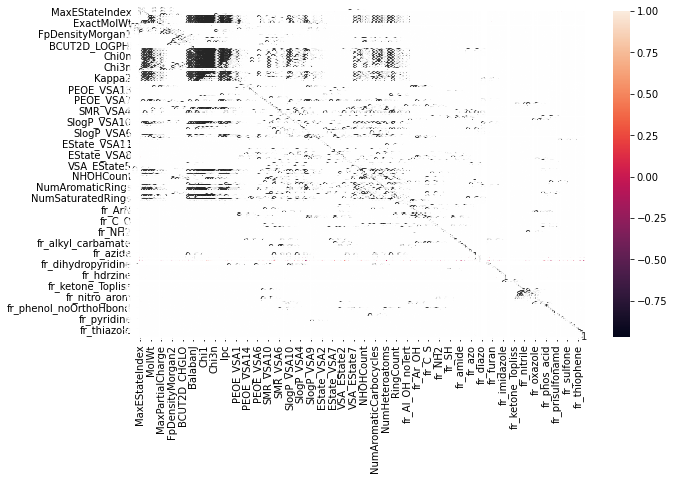

In [90]:
cor = data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cor, annot=True)

# Missing values dropped

In [4]:
data.isnull().sum()

SMILES               0
MaxEStateIndex       0
MinEStateIndex       0
MaxAbsEStateIndex    0
MinAbsEStateIndex    0
                    ..
fr_thiocyan          0
fr_thiophene         0
fr_unbrch_alkane     0
fr_urea              0
TARGET               0
Length: 210, dtype: int64

In [5]:
data_na = data[data.isna().any(axis=1)]
data_na

,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,TARGET
1056,[O-][V]([O-])([O-])=O,8.609375,-5.875000,8.609375,5.87500,0.324875,114.938,114.938,113.928463,32,...,0,0,0,0,0,0,0,0,0,1
1291,O=C1C=CC2=C(C3=CC=CC=C3C(O)=O)C4=CC=C(O)C([As]...,13.194508,-1.742006,13.194508,0.01005,0.244942,664.515,646.371,663.846901,178,...,0,0,0,0,0,0,0,0,0,1


In [6]:
data_na['SMILES'].values

array(['[O-][V]([O-])([O-])=O',
       'O=C1C=CC2=C(C3=CC=CC=C3C(O)=O)C4=CC=C(O)C([As]5SCCS5)=C4OC2=C1[As]6SCCS6'],
      dtype=object)

In [7]:
data[data['SMILES']=='O=c(C1#NNC2=CC=C(S(=O)(O)=O)C=C2)n(C3=CC=CC=C3)N=C1C4=CC=C([N+]([O-])=O)C=C4']

,SMILES,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,TARGET


In [11]:
data = data.dropna()

# Matrix

In [12]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [13]:
X.shape

(1731, 208)

In [14]:
y.shape

(1731,)

# train test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1384, 208) (347, 208) (1384,) (347,)


In [82]:
np.array(np.unique(y_test, return_counts=True)).T

array([[  0, 105],
       [  1, 242]], dtype=int64)

In [83]:
np.array(np.unique(y_train, return_counts=True)).T

array([[  0, 418],
       [  1, 966]], dtype=int64)

# Model Selection

In [17]:
log_reg_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
dec_tree_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
rand_for_params = [{"criterion": "gini"}, {"criterion": "entropy"}]
kneighbors_params = [{"n_neighbors":3}, {"n_neighbors":5}]
naive_bayes_params = [{}]
svc_params = [{"C":0.01}, {"C":0.1}, {"C":1}, {"C":10}]
adaboost_params = [{"n_estimators": 50}, {"n_estimators": 100}, 
                   {"learning_rate":1.0}, {"learning_rate":0.1},{"learning_rate":0.01},
                  {"algorithm": 'SAMME', "algorithm": 'SAMME.R'}]
xgboost_params = [{}]

In [18]:
modelclasses = [
    ["log regression", LogisticRegression, log_reg_params],
    ["decision tree", DecisionTreeClassifier, dec_tree_params],
    ["random forest", RandomForestClassifier, rand_for_params],
    ["k neighbors", KNeighborsClassifier, kneighbors_params],
    ["naive bayes", GaussianNB, naive_bayes_params],
    ["support vector machines", SVC, svc_params],
    ["Adaboost", AdaBoostClassifier, adaboost_params],
    ['XGBoost', XGBClassifier, xgboost_params]
]

In [19]:
insights = []
for modelname, Model, params_list in tqdm(modelclasses):
    for params in params_list:
        model = Model(**params)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        insights.append((modelname, model, params, score))

  0%|          | 0/8 [00:00<?, ?it/s]

C:\Users\nilan\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\nilan\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [20]:
insights.sort(key=lambda x:x[-1], reverse=True)
for modelname, model, params, score in insights:
    print(modelname, params, score)

XGBoost {} 0.8760806916426513
random forest {'criterion': 'gini'} 0.861671469740634
random forest {'criterion': 'entropy'} 0.861671469740634
Adaboost {'n_estimators': 100} 0.8357348703170029
Adaboost {'n_estimators': 50} 0.8184438040345822
Adaboost {'learning_rate': 1.0} 0.8184438040345822
Adaboost {'algorithm': 'SAMME.R'} 0.8184438040345822
decision tree {'criterion': 'gini'} 0.8040345821325648
Adaboost {'learning_rate': 0.1} 0.8040345821325648
decision tree {'criterion': 'entropy'} 0.7982708933717579
k neighbors {'n_neighbors': 5} 0.7377521613832853
k neighbors {'n_neighbors': 3} 0.7262247838616714
naive bayes {} 0.6974063400576369
support vector machines {'C': 0.01} 0.6974063400576369
support vector machines {'C': 0.1} 0.6974063400576369
support vector machines {'C': 1} 0.6974063400576369
support vector machines {'C': 10} 0.6974063400576369
Adaboost {'learning_rate': 0.01} 0.6974063400576369
log regression {'C': 0.01} 0.3025936599423631
log regression {'C': 0.1} 0.3025936599423631
l

# Final Model

In [28]:
model = XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

# Save Model

In [93]:
filename = '..\Models\SHP2_XGBoost_model.sav'
pickle.dump(model, open(filename, 'wb'))

# Evaluation

In [29]:
y_pred = model.predict(X_test)

In [31]:
confusion_matrix(y_test, y_pred)

array([[ 88,  17],
       [ 26, 216]], dtype=int64)

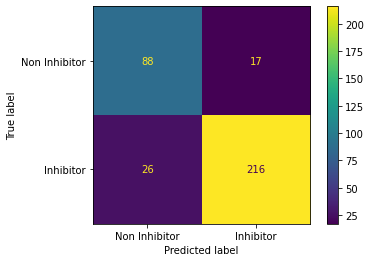

In [87]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels = ['Non Inhibitor', 'Inhibitor'])
cmd.plot()

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.80       105
           1       0.93      0.89      0.91       242

    accuracy                           0.88       347
   macro avg       0.85      0.87      0.86       347
weighted avg       0.88      0.88      0.88       347



In [33]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
roc_auc

0.8653286107831564

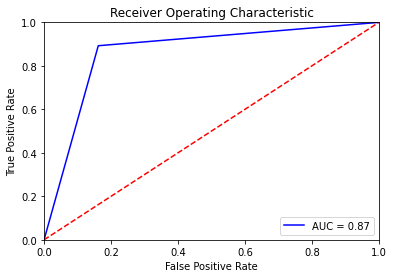

In [34]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()